# Time Series Analysis

Data loaded and cleaned.


C:\Users\gasha\AppData\Local\Temp\ipykernel_34076\997444257.py:30: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['date'].dt.to_period('M').apply(lambda r: r.start_time).dt.tz_localize(tz)


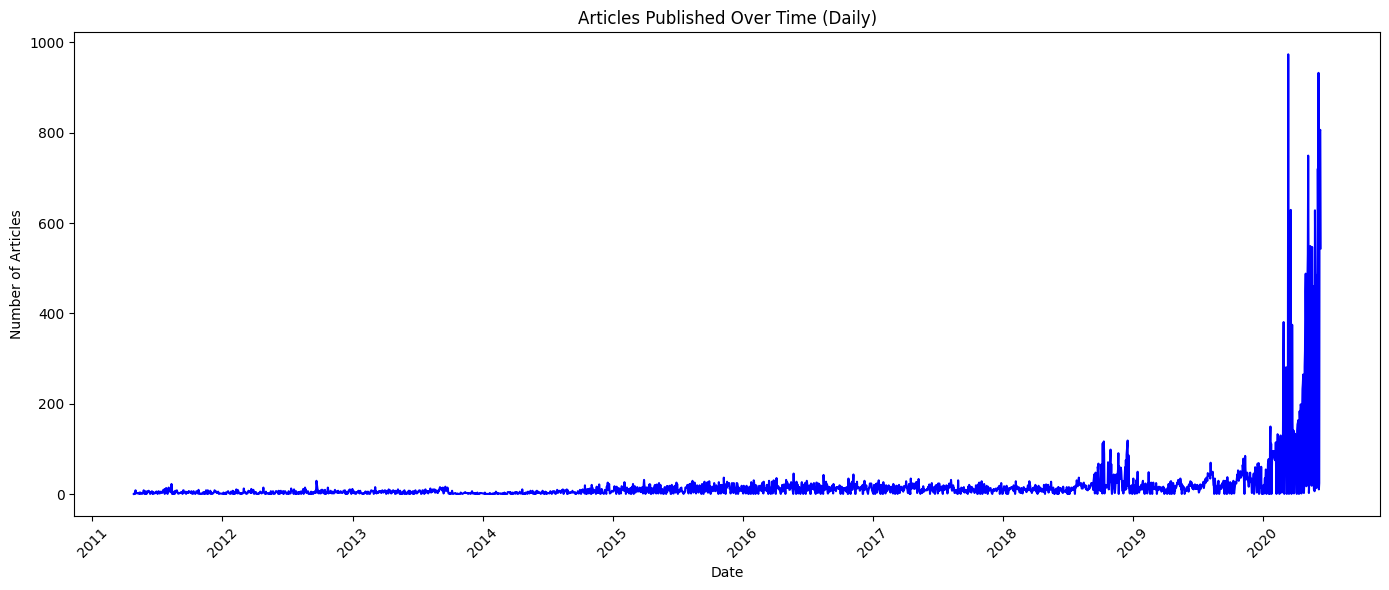

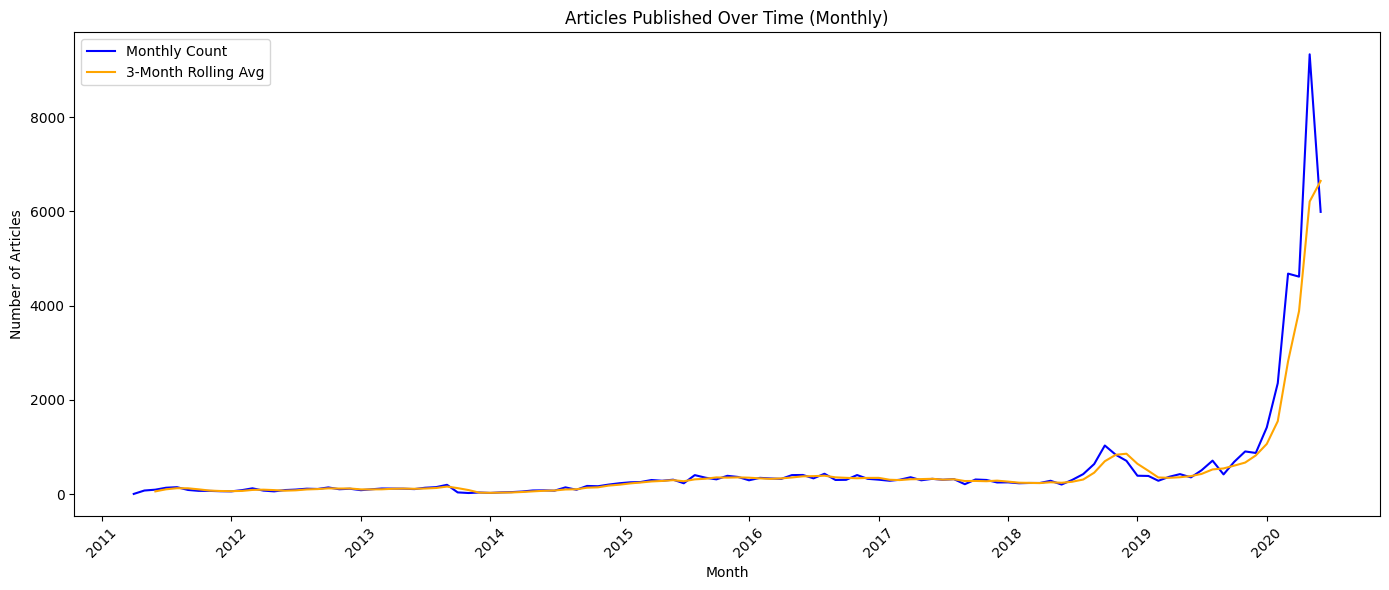

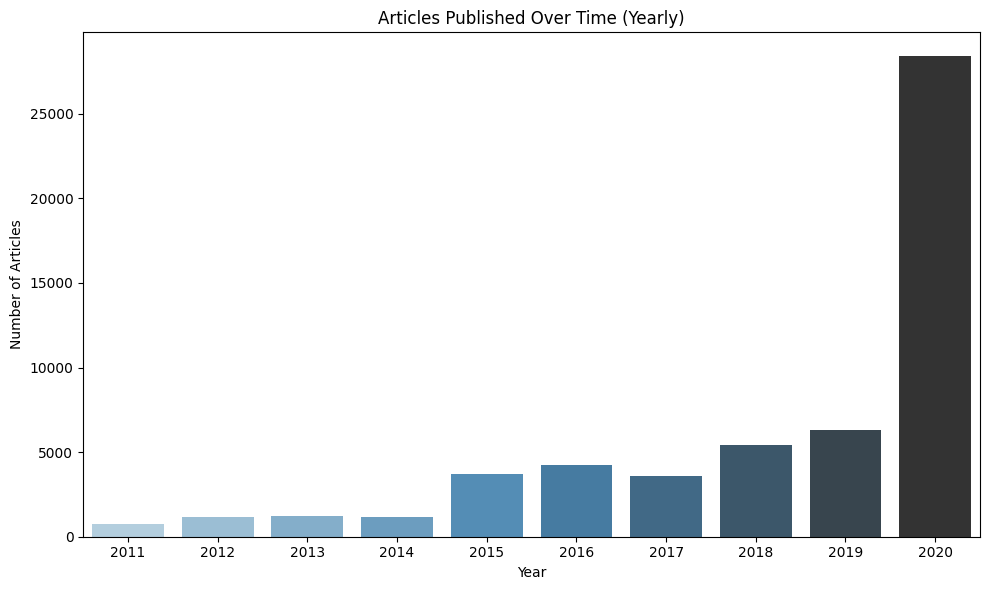

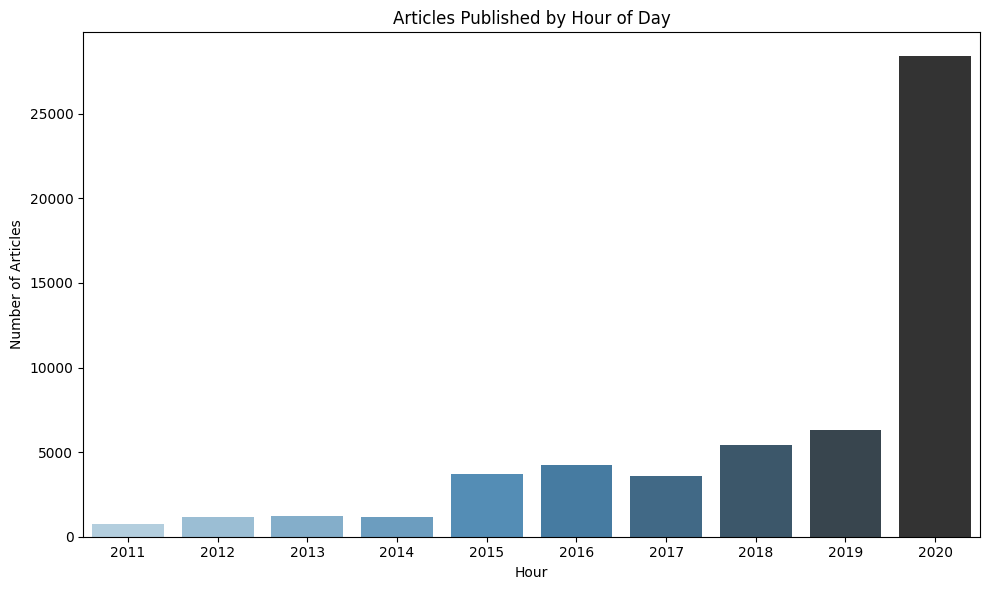

Top spike: 2020-05-01 00:00:00-04:00 with 9333 articles


In [ ]:
import sys
import os
# Path to your src folder
src_path = os.path.abspath("../src")  
sys.path.append(src_path)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import re


# File path
file_path = r"C:\Users\gasha\OneDrive - Wollo University\Desktop\10Academy AIM 8\week 1\Nova-Financial-Solutions-Week1\data\raw_analyst_ratings.csv"
# Load the dataset
df = pd.read_csv(file_path)
df.dropna(subset=['headline', 'date'], inplace=True)
print("Data loaded and cleaned.")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

# Extract components
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.to_period('M').apply(lambda r: r.start_time)

df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour


# Daily Publication Frequency 
daily_counts = df.groupby('day').size().reset_index(name='article_count')

plt.figure(figsize=(14, 6))
sns.lineplot(x='day', y='article_count', data=daily_counts, color='blue')
plt.title('Articles Published Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Publication Frequency 
monthly_counts = df.groupby('month').size().reset_index(name='article_count')
monthly_counts['rolling_avg'] = monthly_counts['article_count'].rolling(window=3).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(x='month', y='article_count', data=monthly_counts, label='Monthly Count', color='blue')
sns.lineplot(x='month', y='rolling_avg', data=monthly_counts, label='3-Month Rolling Avg', color='orange')
plt.title('Articles Published Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Yearly Publication Frequency 
yearly_counts = df.groupby('year').size().reset_index(name='article_count')

plt.figure(figsize=(10, 6))


sns.barplot(x='year', y='article_count',hue='year', data=yearly_counts,palette='Blues_d',dodge=False,legend=False)
#sns.barplot(x='year', y='article_count', data=yearly_counts, palette='Blues_d')
plt.title('Articles Published Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

# Publishing Time Analysis 
hourly_counts = df.groupby('hour').size().reset_index(name='article_count')

plt.figure(figsize=(10, 6))

sns.barplot(x='year', y='article_count',hue='year', data=yearly_counts,palette='Blues_d',dodge=False,legend=False)
#sns.barplot(x='year', y='article_count', data=yearly_counts, palette='Blues_d', hue=None)
plt.title('Articles Published by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

# Identify Spikes
top_spike = monthly_counts.loc[monthly_counts['article_count'].idxmax()]
print(f"Top spike: {top_spike['month']} with {top_spike['article_count']} articles")

